 Чат бот вопрос/ответ структура Transformer

##Задание Ultra pro

Взяв за основу практический ноутбук занятия, постройте трансформер для задачи question answering. Трансформер должен на вход принимать какой-то вопрос, а на выходе генерировать ответ на этот вопрос. Можно использовать любую базу для задачи question answering из tensorflow_datasets, например 'web_questions'.

In [ ]:
# Ваше решение

In [ ]:
# модуль для загрузки файлов в colab
from google.colab import files 

# Подключим tensorflow
import tensorflow as tf 

# Подключим токенайзер
from tensorflow.keras.preprocessing.text import Tokenizer

# Используем метод для формирования последовательностей одинаковой длины
from tensorflow.keras.preprocessing.sequence import pad_sequences 

# Загружаем абстрактный класс базовой модели сети от кераса
from tensorflow.keras.models import Model 

# Подключим необходимые слои
from tensorflow.keras.layers import Dense, Embedding, GRU

# Подключим оптимайзер
from tensorflow.keras.optimizers import Adam 

# Подключим функцию потерь
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Подключим numpy - библиотеку для работы с массивами данных
import numpy as np 

# Подключим библиотеку для визуализации данных
import matplotlib.pyplot as plt 

# Подключим модуль для определения форматирования и местоположения делений на осях графиков
import matplotlib.ticker as ticker 

# Подключим модуль для разбивки данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split 

# Подключим модуль для работы с регулярными выражениями
import re 

# Подключим модуль для работы с временем
import time

# Подключим модуль для работы с операционной системой
import os 
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
ds_train = tfds.load('web_questions', split='train')#.batch(32).prefetch(buffer_size=1000)
ds_test = tfds.load('web_questions', split='test')#.batch(32).prefetch(buffer_size=1000)
#ds1 = tfds.load('mnist', split='train')#.batch(32).prefetch(buffer_size=1000)
#web_questions_dataset, web_questions_info = tfds.load(name = 'web_questions', with_info=True, as_supervised=True)
#assert isinstance(ds, tf.data.Dataset)
#print(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/web_questions/1.0.0.incomplete780W3S/web_questions-train.tfrecord


  0%|          | 0/3778 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/web_questions/1.0.0.incomplete780W3S/web_questions-test.tfrecord


  0%|          | 0/2032 [00:00<?, ? examples/s]

Dataset web_questions downloaded and prepared to /root/tensorflow_datasets/web_questions/1.0.0. Subsequent calls will reuse this data.


In [ ]:
[item['question'] for item in ds_train.take(10)]

[<tf.Tensor: shape=(), dtype=string, numpy=b'who is the ravens quarterback 2012?'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'what political party was henry clay?'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'where to stay in thailand koh samui?'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'what countries are included in the continent of asia?'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'what movies does tupac act in?'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'what did martin luther king jr go to college for?'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'where did jennifer hudson go to school?'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'where is danish located?'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'when did barry zito won the cy young?'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'what language do fiji people speak?'>]

In [ ]:
!ls /root/tensorflow_datasets/web_questions/1.0.0/

dataset_info.json  web_questions-test.tfrecord-00000-of-00001
features.json	   web_questions-train.tfrecord-00000-of-00001


In [ ]:
ds_train.element_spec

{'answers': TensorSpec(shape=(None,), dtype=tf.string, name=None),
 'question': TensorSpec(shape=(), dtype=tf.string, name=None),
 'url': TensorSpec(shape=(), dtype=tf.string, name=None)}

In [ ]:
len(ds_train)

3778

In [ ]:
for images in ds_train.take(1):  # only take first element of dataset
    print(images['answers'])
    print(images['question'])
    print(images['url'])

tf.Tensor([b'Joe Flacco'], shape=(1,), dtype=string)
tf.Tensor(b'who is the ravens quarterback 2012?', shape=(), dtype=string)
tf.Tensor(b'http://www.freebase.com/view/en/baltimore_ravens', shape=(), dtype=string)


In [ ]:
ds_train_list=list(ds_train)
ds_test_list=list(ds_test)
print(len(ds_train_list))
print(len(ds_test_list))
print(ds_train_list[0])
print(ds_test_list[0])


3778
2032
{'answers': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Joe Flacco'], dtype=object)>, 'question': <tf.Tensor: shape=(), dtype=string, numpy=b'who is the ravens quarterback 2012?'>, 'url': <tf.Tensor: shape=(), dtype=string, numpy=b'http://www.freebase.com/view/en/baltimore_ravens'>}
{'answers': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'2006 NFL season'], dtype=object)>, 'question': <tf.Tensor: shape=(), dtype=string, numpy=b'what year did the seahawks win the superbowl?'>, 'url': <tf.Tensor: shape=(), dtype=string, numpy=b'http://www.freebase.com/view/en/seattle_seahawks'>}


Создание выборок.

In [ ]:
Questions_train=[]
Questions_test=[]
Answers_train=[]
Answers_test=[]

for Item in ds_train_list:
  for Answer in Item['answers']:
    Questions_train.append(Item['question'].numpy().decode("utf-8"))
    Answers_train.append(Answer.numpy().decode("utf-8"))
    #print(Item['question'].numpy().decode("utf-8") ,Answer.numpy().decode("utf-8"))
print(len(Questions_train),len(Answers_train))
for Item in ds_test_list:
  for Answer in Item['answers']:
    Questions_test.append(Item['question'].numpy().decode("utf-8"))
    Answers_test.append(Answer.numpy().decode("utf-8"))
    #print(Item['question'].numpy().decode("utf-8") ,Answer.numpy().decode("utf-8"))
print(len(Questions_test),len(Answers_test))

8933 8933
4863 4863


Пример вопрос/ответ

In [ ]:
for i in range(20):
  print(Questions_train[i],"           ",Answers_train[i])

who is the ravens quarterback 2012?             Joe Flacco
what political party was henry clay?             Whig Party
where to stay in thailand koh samui?             UTC+07:00
what countries are included in the continent of asia?             Bahrain
what countries are included in the continent of asia?             Afghanistan
what countries are included in the continent of asia?             Bangladesh
what countries are included in the continent of asia?             Bhutan
what countries are included in the continent of asia?             Brunei
what countries are included in the continent of asia?             Indonesia
what countries are included in the continent of asia?             India
what countries are included in the continent of asia?             Cambodia
what countries are included in the continent of asia?             China
what countries are included in the continent of asia?             Iraq
what movies does tupac act in?             Murder Was the Case
what movies does t

In [ ]:
len(Questions_train+Answers_train)

17866

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus((Questions_train+Answers_train), target_vocab_size=2**13)


In [ ]:
# тестовая фраза
sample_string = Questions_train[0]+" "+Answers_train[0]

# перегоним слова в токены
tokenized_string = tokenizer.encode(sample_string) 
print ('Tokenized string is {}'.format(tokenized_string))

# перегоним токены обратно в слова
original_string = tokenizer.decode(tokenized_string) 
print ('The original string: {}'.format(original_string))

# распишем какой токен чему соответсвует
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts]))) 

# а точно исходная фраза соответствует дважды перекодированной?
assert original_string == sample_string 

Tokenized string is [8, 5, 2, 740, 5552, 125, 8863, 8832, 1491, 8052]
The original string: who is the ravens quarterback 2012? Joe Flacco
8 ----> who 
5 ----> is 
2 ----> the 
740 ----> ravens 
5552 ----> quarterback 
125 ----> 2012
8863 ----> ?
8832 ---->  
1491 ----> Joe 
8052 ----> Flacco


In [ ]:
print(tokenizer.vocab_size)

9056


In [ ]:
def tokenize(InputText): # Функция принимает текст одного из языков

  tensor = [tokenizer.vocab_size] + tokenizer.encode(InputText[0]) + [tokenizer.vocab_size+1] # Разбиваем текст фраз на последовательности индексов
  tensor = pad_sequences(tensor, padding='post')           # Делаем последовательности фиксированной длины, заполняя нулями более короткие фразы

  # Возвращаем последовательность индексов(назовем ее тензор) и токенизатор
  return tensor

In [ ]:
# размер буффеа в памяти при приготовления датасета
BUFFER_SIZE = 20000 

# размер батча
BATCH_SIZE = 64  

# ограничим максимальную длину фразу
MAX_LENGTH = 40  

In [ ]:
def encode(InputText):
  #print(InputText)
  OutputTokens = [tokenizer.vocab_size] + tokenizer.encode(InputText) + [tokenizer.vocab_size+1]
  #print(InputText)
  #OutputTokens = tf.keras.preprocessing.sequence.pad_sequences(OutputTokens, maxlen=MAX_LENGTH, dtype='int32', padding='post')
  return tf.convert_to_tensor(OutputTokens)

In [ ]:
def filter_max_length(x, y, max_length=MAX_LENGTH):
    
  return tf.logical_and(tf.size(x) <= max_length, # вернем маску, она уберет впоследствии длииные фразы
                        tf.size(y) <= max_length)

In [ ]:
# Прогоняем тектсы через токенайзер
Questions_train_encoded= list(map(encode, Questions_train))
Answers_train_encoded=list(map(encode, Answers_train))
Questions_test_encoded=list(map(encode, Questions_test))
Answers_test_encoded=list(map(encode, Answers_test))
#Questions_train_encoded = pad_sequences(Questions_train_encoded, padding='post')
#Answers_train_encoded = pad_sequences(Answers_train_encoded, padding='post')
#Questions_test_encoded = pad_sequences(Questions_test_encoded, padding='post')
#Answers_test_encoded = pad_sequences(Answers_test_encoded, padding='post')
Questions_train1=[]
Questions_test1=[]
Answers_train1=[]
Answers_test1=[]

for i in range(len(Questions_train_encoded)):
  if(len(Questions_train_encoded[i])<MAX_LENGTH and len(Answers_train_encoded[i])<MAX_LENGTH):
    Questions_train1.append(Questions_train[i])
    Answers_train1.append(Answers_train[i])
    #Answers_train1_S.append(Answers_train[i][:-1])
    #Answers_train1_E.append(Answers_train[i][1:])

for i in range(len(Questions_test_encoded)):
  if(len(Questions_test_encoded[i])<MAX_LENGTH and len(Answers_test_encoded[i])<MAX_LENGTH):
    Questions_test1.append(Questions_test[i])
    Answers_test1.append(Answers_test[i])
    #Answers_test1_S.append(Answers_test[i][:-1])
    #Answers_test1_E.append(Answers_test[i][1:])


Questions_train_encoded_SE= list(map(encode, Questions_train1))
Answers_train_encoded_SE=list(map(encode, Answers_train1))
Answers_train_encoded_S=[q[:-1] for q in Answers_train_encoded_SE]
Answers_train_encoded_E=[q[1:] for q in Answers_train_encoded_SE]
Questions_test_encoded_SE=list(map(encode, Questions_test1))
Answers_test_encoded_SE=list(map(encode, Answers_test1))
Answers_test_encoded_S=[q[:-1] for q in Answers_test_encoded_SE]
Answers_test_encoded_E=[q[1:] for q in Answers_test_encoded_SE]
Questions_train_encoded_SE = pad_sequences(Questions_train_encoded_SE, padding='post')
Answers_train_encoded_SE = pad_sequences(Answers_train_encoded_SE, padding='post')
Answers_train_encoded_S = pad_sequences(Answers_train_encoded_S, padding='post')
Answers_train_encoded_E = pad_sequences(Answers_train_encoded_E, padding='post')
Questions_test_encoded_SE = pad_sequences(Questions_test_encoded_SE, padding='post')
Answers_test_encoded_SE = pad_sequences(Answers_test_encoded_SE, padding='post')
Answers_test_encoded_S = pad_sequences(Answers_test_encoded_S, padding='post')
Answers_test_encoded_E = pad_sequences(Answers_test_encoded_E, padding='post')

Questions_train_encoded_SE=np.array(Questions_train_encoded_SE)
Answers_train_encoded_SE=np.array(Answers_train_encoded_SE)
Answers_train_encoded_S=np.array(Answers_train_encoded_S)
Answers_train_encoded_E=np.array(Answers_train_encoded_E)
Questions_test_encoded_SE=np.array(Questions_test_encoded_SE)
Answers_test_encoded_SE=np.array(Answers_test_encoded_SE)
Answers_test_encoded_S=np.array(Answers_test_encoded_S)
Answers_test_encoded_E=np.array(Answers_test_encoded_E)


Примеры после токенайзера

In [ ]:
print(Answers_train_encoded_SE[0])
print(Answers_train_encoded_S[0])
print(Answers_train_encoded_E[0])


[9056 1491 8052 9057    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
[9056 1491 8052    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]
[1491 8052 9057    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


In [ ]:
Questions_train_encoded[0]

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([9056,    8,    5,    2,  740, 5552,  125, 8863, 9057], dtype=int32)>

Позиционное кодирование

In [ ]:
def get_angles(pos, i, d_model):
    
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
print(np.sin(get_angles(0,np.arange(10),10)))
print(np.sin(get_angles(1,np.arange(10),10)))
print(np.sin(get_angles(2,np.arange(10),10)))
print(np.sin(get_angles(3,np.arange(10),10)))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[8.41470985e-01 8.41470985e-01 1.57826640e-01 1.57826640e-01
 2.51162229e-02 2.51162229e-02 3.98106119e-03 3.98106119e-03
 6.30957303e-04 6.30957303e-04]
[0.90929743 0.90929743 0.31169715 0.31169715 0.0502166  0.0502166
 0.00796206 0.00796206 0.00126191 0.00126191]
[0.14112001 0.14112001 0.45775455 0.45775455 0.07528529 0.07528529
 0.01194293 0.01194293 0.00189287 0.00189287]


In [ ]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return tf.cast(pos_encoding, dtype=tf.float32)

(1, 10, 100)


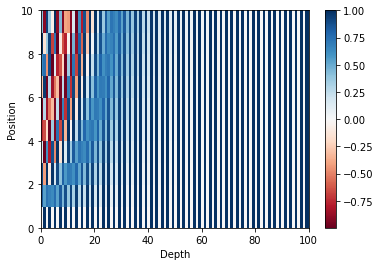

In [ ]:
pos_encoding = positional_encoding(10, 100)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 100))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model = 512, num_heads = 8, causal=False, dropout=0.0):

    super(MultiHeadAttention, self).__init__()  # здесь все головы считаем паралелльно - поэтому attention пробегает и  по батчу и по числу голов

    assert d_model % num_heads == 0 # проверим, что размерность головы - целое цисло
    depth = d_model // num_heads    # размерность каждой головы внимания  =>>  multi-headed_depth = depth / num_heads
                                    # заметим, что выходы голов конкатенируются, поэтому их размер в их число раз меньше.
                                    # поэтому размерность выхода должно совпасть в размерностью входа

    self.w_query = tf.keras.layers.Dense(d_model)                            # dense для Query  (batch_size , seq_length, depth) 
    self.split_reshape_query = tf.keras.layers.Reshape((-1,num_heads,depth)) # слой для решейпа query до  (batch_size , seq_length, num_heads, multi_headed_depth)  
    self.split_permute_query = tf.keras.layers.Permute((2,1,3))              # слой для перестановки размерностей для использования Attention (batch_size , num_heads, seq_length, multi_headed_depth) 

    self.w_value = tf.keras.layers.Dense(d_model)
    self.split_reshape_value = tf.keras.layers.Reshape((-1,num_heads,depth))
    self.split_permute_value = tf.keras.layers.Permute((2,1,3))

    self.w_key = tf.keras.layers.Dense(d_model)
    self.split_reshape_key = tf.keras.layers.Reshape((-1,num_heads,depth))
    self.split_permute_key = tf.keras.layers.Permute((2,1,3))

    self.attention = tf.keras.layers.Attention(causal=causal, dropout=dropout) # прописывает слой Attention
    self.join_permute_attention = tf.keras.layers.Permute((2,1,3))             # слой обратной перестановки размерностей
    self.join_reshape_attention = tf.keras.layers.Reshape((-1,d_model))        # слой обратного решейпа до размернсти модели

    self.dense = tf.keras.layers.Dense(d_model)

  def call(self, inputs, mask=None, training=None): # основная рабочая функция

    q = inputs[0]                           # вытащим входной вектор Query
    v = inputs[1]                           # вытащим входной вектор Value
    k = inputs[2] if len(inputs) > 2 else v # вытащим входной вектор Key

    query = self.w_query(q)                   # прогоним через dense
    query = self.split_reshape_query(query)   # решейпим
    query = self.split_permute_query(query)   # переставляем размерность

    value = self.w_value(v)                 # прогоним через dense
    value = self.split_reshape_value(value) # решейпим
    value = self.split_permute_value(value) # переставляем размерность

    key = self.w_key(k)               # прогоним через dense
    key = self.split_reshape_key(key) # решейпим
    key = self.split_permute_key(key) # переставляем размерность

    if mask is not None: # применим маску если есть 

      if mask[0] is not None:
        mask[0] = tf.keras.layers.Reshape((-1,1))(mask[0])
        mask[0] = tf.keras.layers.Permute((2,1))(mask[0])
      
      if mask[1] is not None:
        mask[1] = tf.keras.layers.Reshape((-1,1))(mask[1])
        mask[1] = tf.keras.layers.Permute((2,1))(mask[1])

    attention = self.attention([query, value, key], mask=mask) # вычисляем векторо внимания
    attention = self.join_permute_attention(attention)         # обратно перемешиваем размерности
    attention = self.join_reshape_attention(attention)         # решейпим до (batch_size , seq_length, depth) 

    x = self.dense(attention) # выходной dense

    return x

In [ ]:
class EncoderLayer(tf.keras.layers.Layer): 

  def __init__(self,  d_model = 512, num_heads = 8, dff = 2048, dropout = 0.0):
    super(EncoderLayer, self).__init__()

    self.multi_head_attention =  MultiHeadAttention(d_model, num_heads)  # определим слой  MultiHeadAttention
    self.dropout_attention = tf.keras.layers.Dropout(dropout)            # добавим дропаут
    self.add_attention = tf.keras.layers.Add()                           # слой для получения resudial связи
    self.layer_norm_attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)  # слой нормализации

    self.dense1 = tf.keras.layers.Dense(dff, activation='relu')               # первый dense в Feed Forward
    self.dense2 = tf.keras.layers.Dense(d_model)                              # второй  dense в Feed Forward
    self.dropout_dense = tf.keras.layers.Dropout(dropout)                     # добавим дропаут
    self.add_dense = tf.keras.layers.Add()                                    # слой для получения resudial связи
    self.layer_norm_dense = tf.keras.layers.LayerNormalization(epsilon=1e-6)  # слой нормализации

  def call(self, inputs, mask=None, training=None):
    
    # print(mask)

    # входной вектор input размножим до 3  - это query, value, key и отдадим attenton, с маской если есть 
    attention = self.multi_head_attention([inputs,inputs,inputs], mask = [mask,mask]) 
    
    # уменьшим переобучение дроаутом
    attention = self.dropout_attention(attention, training = training) 
    
    # сделаем resudial связь - добавим входной вектор
    x = self.add_attention([inputs , attention]) 
    
    # далее нормализация в масштабах уровня
    x = self.layer_norm_attention(x)  
    # x = inputs

    ## добавим Feed Forward  
    
    # проходим 1й dense с активашкой relu
    dense = self.dense1(x) 
    
    # второй dense без активашки т.е. с линейной активационной функцией
    dense = self.dense2(dense)  
    
    # добавляем дропаут
    dense = self.dropout_dense(dense, training = training)  
    
    # еще одна resudial связь
    x = self.add_dense([x , dense])  
    
    # нормализация в масштабах уровня
    x = self.layer_norm_dense(x)  

    return x

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):

  def __init__(self,  d_model = 512, num_heads = 8, dff = 2048, dropout = 0.0):

    super(DecoderLayer, self).__init__()

    self.multi_head_attention1 =  MultiHeadAttention(d_model, num_heads, causal = True) # определим слой  MultiHeadAttention
    self.dropout_attention1 = tf.keras.layers.Dropout(dropout)                          # добавим дропаут
    self.add_attention1 = tf.keras.layers.Add()                                         # слой для получения resudial связи
    self.layer_norm_attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)       # слой нормализации

    self.multi_head_attention2 =  MultiHeadAttention(d_model, num_heads)                # определим слой  MultiHeadAttention 
    self.dropout_attention2 = tf.keras.layers.Dropout(dropout)                          # добавим дропаут
    self.add_attention2 = tf.keras.layers.Add()                                         # слой для получения resudial связи
    self.layer_norm_attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)       # слой нормализации


    self.dense1 = tf.keras.layers.Dense(dff, activation='relu')              # первый dense в Feed Forward
    self.dense2 = tf.keras.layers.Dense(d_model)                             # второй  dense в Feed Forward
    self.dropout_dense = tf.keras.layers.Dropout(dropout)                    # добавим дропаут
    self.add_dense = tf.keras.layers.Add()                                   # слой для получения resudial связи
    self.layer_norm_dense = tf.keras.layers.LayerNormalization(epsilon=1e-6) # слой нормализации

  def call(self, inputs, mask=None, training=None):
    
    # print(mask)
    
    # подадим на multi-head attention  Query, Key, Value вектора - здесь это один и тотже вектор
    attention = self.multi_head_attention1([inputs[0],inputs[0],inputs[0]], mask = [mask[0],mask[0]])
    
    # пробежим дропаут
    attention = self.dropout_attention1(attention, training = training)
    
    # пробросим Resudial-связь
    x = self.add_attention1([inputs[0] , attention])
    
    # выполним нормализацию
    x = self.layer_norm_attention1(x)
    
    # второй multi-head attention. Подаем выход предыдущих слоев x и выход от энкодера, маску (если есть)
    attention = self.multi_head_attention2([x, inputs[1],inputs[1]], mask = [mask[0],mask[1]])
    
    # прогоняем через дропаут
    attention = self.dropout_attention2(attention, training = training)
    
    # пробросим Resudial-связь
    x = self.add_attention1([x , attention])
    
    # выполним нормализацию
    x = self.layer_norm_attention1(x)

    ## Feed Forward
    
    # 1 -dense + relu
    dense = self.dense1(x)

    # 2 dense +linear
    dense = self.dense2(dense)

    # прогоняем через дропаут
    dense = self.dropout_dense(dense, training = training)

    # пробросим Resudial-связь
    x = self.add_dense([x , dense])

    # выполним нормализацию
    x = self.layer_norm_dense(x)

    return x

In [ ]:
class Encoder(tf.keras.layers.Layer):

  def __init__(self, input_vocab_size, num_layers = 4, d_model = 512, num_heads = 8, dff = 2048, maximum_position_encoding = 10000, dropout = 0.0):
    
    super(Encoder, self).__init__()

    self.d_model = d_model

    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model, mask_zero=True)                           # пропишем слой Embedding
    self.pos = positional_encoding(maximum_position_encoding, d_model)                                              # функция позиционного кодирования
    self.encoder_layers = [ EncoderLayer(d_model = d_model, num_heads = num_heads, dff = dff, dropout = dropout) for _ in range(num_layers)] # список Nx слоев кодера 
    self.dropout = tf.keras.layers.Dropout(dropout)                                                                 # просто дропаут

  def call(self, inputs, mask=None, training=None):
    
    # входной эмбеддинг  
    x = self.embedding(inputs) 
    
    # позиционное кодирование
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))  #
    x += self.pos[: , :tf.shape(x)[1], :]
    
    # прогоняем через дроаут
    x = self.dropout(x, training=training)

    # Encoder layer

    # входной слой embedding+ Позиционное кодирование
    embedding_mask = self.embedding.compute_mask(inputs)

    # прогоним через Nx слоев кодера
    for encoder_layer in self.encoder_layers: 
      x = encoder_layer(x, mask = embedding_mask)

    return x

  # Закомментируйте код ниже, если хотите использовать masked_loss()
  def compute_mask(self, inputs, mask=None):
    return self.embedding.compute_mask(inputs)

In [ ]:
class Decoder(tf.keras.layers.Layer):

  def __init__(self, target_vocab_size, num_layers = 4, d_model = 512, num_heads = 8, dff = 2048, maximum_position_encoding = 10000, dropout = 0.0):
    
    super(Decoder, self).__init__()

    self.d_model = d_model

    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model, mask_zero=True) # пропишем слой Embedding
    self.pos = positional_encoding(maximum_position_encoding, d_model)                     # функция позиционного кодирования
    self.decoder_layers = [ DecoderLayer(d_model = d_model, num_heads = num_heads, dff = dff, dropout = dropout)  for _ in range(num_layers)] # список Nx слоев декодера 
    self.dropout = tf.keras.layers.Dropout(dropout)                                        # просто дропаут

  def call(self, inputs, mask=None, training=None):
    
    # выполним переход в эмбеддинг
    x = self.embedding(inputs[0]) 
    
    # позиционное кодирование
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos[: , :tf.shape(x)[1], :]
    
    # просто dropout
    x = self.dropout(x, training=training)

    # Decoder layer
    
    # входной слой embedding + Позиционное кодирование
    embedding_mask = self.embedding.compute_mask(inputs[0])

    # прогоним через Nx слоев декодера
    for decoder_layer in self.decoder_layers:
      x = decoder_layer([x,inputs[1]], mask = [embedding_mask, mask])

    return x

  # Закомментируйте код ниже, если хотите использовать masked_loss()
  def compute_mask(self, inputs, mask=None):
    return self.embedding.compute_mask(inputs[0])

In [ ]:
num_layers = 2
d_model = 128
dff = 512
num_heads = 16

dropout_rate = 0.2

vocab_size = tokenizer.vocab_size + 2


input  = tf.keras.layers.Input(shape=(None,)) # входной слой для переводимой фразы
target = tf.keras.layers.Input(shape=(None,)) # вход для перевода
encoder = Encoder(vocab_size, num_layers = num_layers, d_model = d_model, num_heads = num_heads, dff = dff, dropout = dropout_rate) # весь кодер
decoder = Decoder(vocab_size, num_layers = num_layers, d_model = d_model, num_heads = num_heads, dff = dff, dropout = dropout_rate) #весь декодер

# собираем модель 
x = encoder(input)
x = decoder([target, x] , mask = encoder.compute_mask(input))
x = tf.keras.layers.Dense(vocab_size)(x)

model = tf.keras.models.Model(inputs=[input, target], outputs=x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 encoder (Encoder)              (None, None, 128)    1555968     ['input_1[0][0]']                
                                                                                                  
 tf.math.not_equal (TFOpLambda)  (None, None)        0           ['input_1[0][0]']                
                                                                                              

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
# оптимайзер 
optimizer = tf.keras.optimizers.Adam(CustomSchedule(d_model), beta_1=0.9, beta_2=0.98, 
                                     epsilon=1e-9)
# функция потерь
loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def masked_loss(y_true, y_pred):

  # считаем маску  
  mask = tf.math.logical_not(tf.math.equal(y_true, 0))
  _loss = loss(y_true, y_pred)
  #print(mask)
  mask = tf.cast(mask, dtype=_loss.dtype)

  # накинем маску на потери  
  _loss *= mask

  return tf.reduce_sum(_loss)/tf.reduce_sum(mask)

metrics = [loss, masked_loss, tf.keras.metrics.SparseCategoricalAccuracy()]

model.compile(optimizer=optimizer, loss = loss, metrics = metrics) # masked_

In [ ]:
batchSize=32
class Tgenerator(tf.keras.utils.Sequence):

    def __init__(self, Questions_SE,Answers_S,Answers_E, batch_size):
        print("__init__")
        #self.Df = Df
        self.Questions_SE=Questions_SE
        self.Answers_S = Answers_S
        self.Answers_E=Answers_E
        self.batch_size = batch_size
        
    def __len__(self):
      return int((len(self.Questions_SE))/ self.batch_size)#math.ceil

    def __getitem__(self, idx):
        batch_Questions_SE = list()
        batch_Answers_S = list()
        batch_Answers_E = list()
        for i in range(idx*self.batch_size,(idx+1)*self.batch_size):
          batch_Questions_SE.append(self.Questions_SE[i])
          batch_Answers_S.append(self.Answers_S[i])
          batch_Answers_E.append(self.Answers_E[i])
          
        batch_Questions_SE=np.array(batch_Questions_SE)
        batch_Answers_S=np.array(batch_Answers_S)
        batch_Answers_E=np.array(batch_Answers_E)
        return ([batch_Questions_SE , batch_Answers_S] , batch_Answers_E )
num_batches=len(Questions_train_encoded)//batchSize
val_batches=len(Questions_test_encoded)//batchSize

In [ ]:
train_datagen=Tgenerator(Questions_train_encoded_SE,Answers_train_encoded_S,Answers_train_encoded_E, batchSize)
test_datagen=Tgenerator(Questions_test_encoded_SE,Answers_test_encoded_S,Answers_test_encoded_E, batchSize)

__init__
__init__


In [ ]:
#num head = 16
history = model.fit(train_datagen, epochs=40, steps_per_epoch = train_datagen.__len__(),validation_data = test_datagen, validation_steps = test_datagen.__len__())#, validation_data = generator(Questions_test_encoded,Answers_test_encoded,batchSize), validation_steps = val_batches

Epoch 1/40
278/278 [==============================] - 149s 505ms/step - loss: 1.0404 - sparse_categorical_crossentropy: 8.5691 - masked_loss: 8.5691 - sparse_categorical_accuracy: 0.1817 - val_loss: 0.9939 - val_sparse_categorical_crossentropy: 7.7999 - val_masked_loss: 7.7999 - val_sparse_categorical_accuracy: 0.2065
Epoch 2/40
278/278 [==============================] - 142s 512ms/step - loss: 0.8509 - sparse_categorical_crossentropy: 7.0085 - masked_loss: 7.0085 - sparse_categorical_accuracy: 0.2353 - val_loss: 0.8621 - val_sparse_categorical_crossentropy: 6.7658 - val_masked_loss: 6.7658 - val_sparse_categorical_accuracy: 0.2065
Epoch 3/40
278/278 [==============================] - 143s 513ms/step - loss: 0.7780 - sparse_categorical_crossentropy: 6.4083 - masked_loss: 6.4083 - sparse_categorical_accuracy: 0.2381 - val_loss: 0.8252 - val_sparse_categorical_crossentropy: 6.4764 - val_masked_loss: 6.4764 - val_sparse_categorical_accuracy: 0.2120
Epoch 4/40
278/278 [====================

KeyboardInterrupt: ignored

Дальше начинает переучиваться.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
model.save_weights('/content/drive/My Drive/NN/model_weight_Transformers_Q_A_16h.h5');

In [ ]:
print(np.shape(Questions_test_encoded_SE[0]))
print(np.shape(Answers_test_encoded_S[0]))

(22,)
(38,)


In [ ]:
Question_batch, Answer_batch = [Q for Q in Questions_test_encoded_SE[0:32]],[A for A in Answers_test_encoded_S[0:32]]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
model.save_weights('/content/drive/My Drive/NN/model_weight_Transformers_en_ru_16h.h5');

ТЕсты

Тренировочная выборка.

In [ ]:
for i in range(30):
  translation = [tokenizer.vocab_size]
  for _ in range(MAX_LENGTH):
    predict = model.predict([np.asarray([Questions_train_encoded_SE[i]]),np.asarray([translation])])
    translation.append(np.argmax(predict[-1,-1]))
    if translation[-1] == tokenizer.vocab_size + 1:
      break

  real_translation = []
  for w in Answers_train_encoded_S[:,1:][i]:
    if w == tokenizer.vocab_size + 1:
      break
    real_translation.append(w)
  Questions_train_encoded1=Questions_train_encoded_SE[i]
  Questions_train_encoded1[Questions_train_encoded1==tokenizer.vocab_size+1]=0
  #print(Questions_train_encoded1)
  print("Question=",tokenizer.decode(Questions_train_encoded1[1:]))
  print("Answer=",tokenizer.decode(Answers_train_encoded_S[i][1:]))
  print("Prediction=",tokenizer.decode(translation[1:-1]))
  print("")

Question= who is the ravens quarterback 2012?
Answer= Joe Flacco
Prediction= Matt Romney

Question= what political party was henry clay?
Answer= Whig Party
Prediction= Republican Party

Question= where to stay in thailand koh samui?
Answer= UTC+07:00
Prediction= UTC−06:00

Question= what countries are included in the continent of asia?
Answer= Bahrain
Prediction= Tajikistan

Question= what countries are included in the continent of asia?
Answer= Afghanistan
Prediction= Tajikistan

Question= what countries are included in the continent of asia?
Answer= Bangladesh
Prediction= Tajikistan

Question= what countries are included in the continent of asia?
Answer= Bhutan
Prediction= Tajikistan

Question= what countries are included in the continent of asia?
Answer= Brunei
Prediction= Tajikistan

Question= what countries are included in the continent of asia?
Answer= Indonesia
Prediction= Tajikistan

Question= what countries are included in the continent of asia?
Answer= India
Prediction= Tajik

Тестовая выборка

In [ ]:
for i in range(30):
  translation = [tokenizer.vocab_size]
  for _ in range(MAX_LENGTH):
    predict = model.predict([np.asarray([Questions_test_encoded_SE[i]]),np.asarray([translation])])
    translation.append(np.argmax(predict[-1,-1]))
    if translation[-1] == tokenizer.vocab_size + 1:
      break

  real_translation = []
  for w in Answers_train_encoded_S[:,1:][i]:
    if w == tokenizer.vocab_size + 1:
      break
    real_translation.append(w)
  Questions_test_encoded1=Questions_test_encoded_SE[i]
  Questions_test_encoded1[Questions_test_encoded1==tokenizer.vocab_size+1]=0
  #print(Questions_train_encoded1)
  print("Question=",tokenizer.decode(Questions_test_encoded1[1:]))
  print("Answer=",tokenizer.decode(Answers_test_encoded_S[i][1:]))
  print("Prediction=",tokenizer.decode(translation[1:-1]))
  print("")

Question= what year did the seahawks win the superbowl?
Answer= 2006 NFL season
Prediction= Super Bowl XXX

Question= who inspired obama?
Answer= Saul Alinsky
Prediction= Actor

Question= who inspired obama?
Answer= Nipsey Russell
Prediction= Actor

Question= who killed martin luther king jr video?
Answer= Assassination by firearm
Prediction= William Daniels

Question= where did charles darwin and his wife live?
Answer= Downe, Kent
Prediction= London

Question= where did charles darwin and his wife live?
Answer= England
Prediction= London

Question= where did charles darwin and his wife live?
Answer= London
Prediction= London

Question= where did charles darwin and his wife live?
Answer= Shrewsbury
Prediction= London

Question= what happened at benghazi?
Answer= 2012 U.S. diplomatic missions attacks
Prediction= Film Producer

Question= what happened at benghazi?
Answer= 2012 U.S. Consulate attack in Benghazi
Prediction= Film Producer

Question= what happened at benghazi?
Answer= First 

В общем неплохо но датасет недостаточный, если задать окромный обучающий датасет будет еще лучше.